In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
nba = pd.read_parquet('nba_pgdata.parquet')
display(nba)


,Player,Salary,Age,FG,RB,AST,STL,BLK,PTS
0,A.J. Price,885.120,26,2.824561,2.000000,3.596491,0.578947,0.052632,7.736842
1,Aaron Brooks,3250.000,28,2.698113,1.509434,2.150943,0.566038,0.188679,7.094340
2,Al Harrington,6687.400,32,2.000000,2.700000,1.000000,0.400000,0.100000,5.100000
3,Al Horford,12000.000,26,7.783784,10.229730,3.243243,1.054054,1.054054,17.418919
4,Al Jefferson,15000.000,28,7.833333,9.230769,2.102564,1.025641,1.141026,17.833333
...,...,...,...,...,...,...,...,...,...
365,Willie Green,1375.000,31,2.472222,1.347222,0.763889,0.402778,0.166667,6.250000
366,Wilson Chandler,5930.414,25,4.883721,5.069767,1.348837,1.046512,0.279070,13.023256
367,Xavier Henry,2323.200,21,1.320000,1.800000,0.260000,0.320000,0.100000,3.880000
368,Zach Randolph,16500.000,31,6.197368,11.236842,1.421053,0.802632,0.407895,15.381579


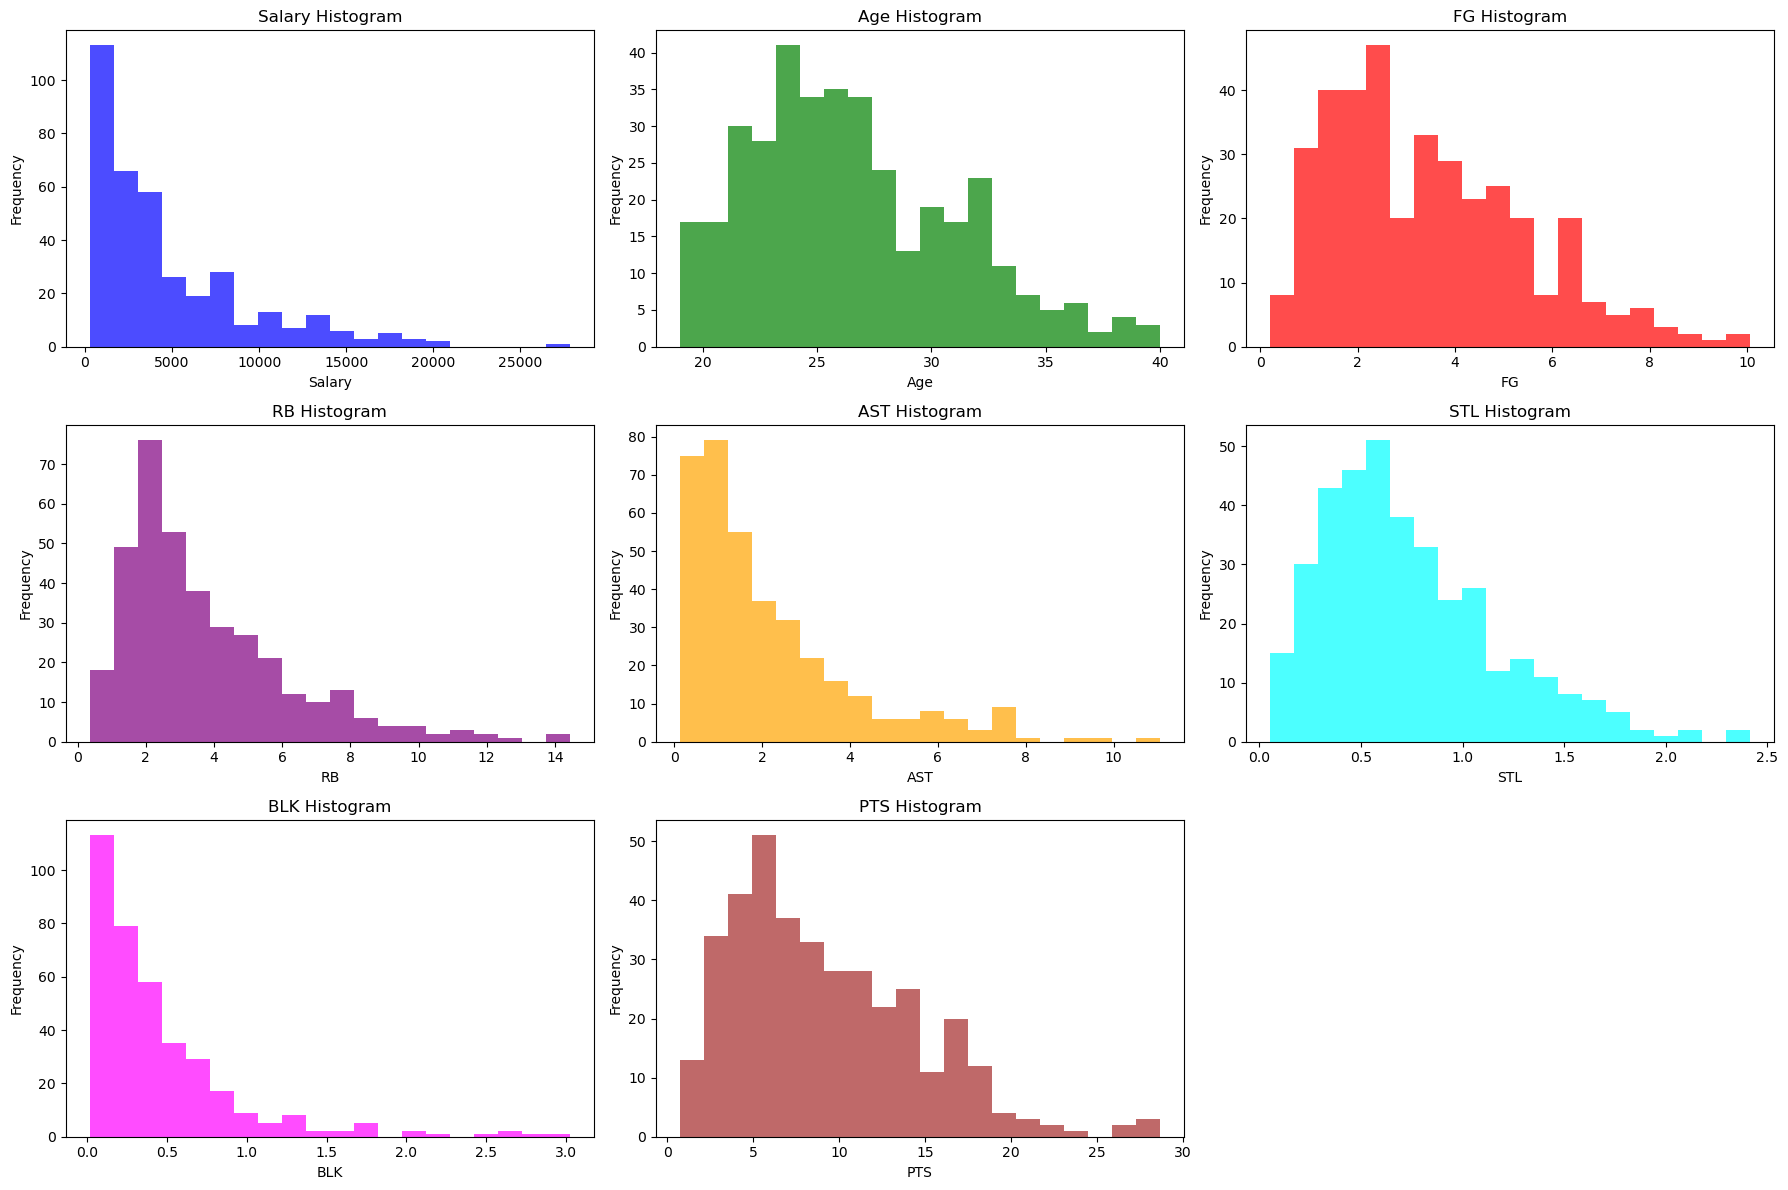

In [4]:
plt.figure(figsize=(18, 12))

# Salary
plt.subplot(3, 3, 1)
plt.hist(nba['Salary'], bins=20, color='blue', alpha=0.7)
plt.title('Salary Histogram')
plt.xlabel('Salary')
plt.ylabel('Frequency')

# Age
plt.subplot(3, 3, 2)
plt.hist(nba['Age'], bins=20, color='green', alpha=0.7)
plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')

# FG
plt.subplot(3, 3, 3)
plt.hist(nba['FG'], bins=20, color='red', alpha=0.7)
plt.title('FG Histogram')
plt.xlabel('FG')
plt.ylabel('Frequency')

plt.subplot(3, 3, 4)
plt.hist(nba['RB'], bins=20, color='purple', alpha=0.7)
plt.title('RB Histogram')
plt.xlabel('RB')
plt.ylabel('Frequency')

# AST
plt.subplot(3, 3, 5)
plt.hist(nba['AST'], bins=20, color='orange', alpha=0.7)
plt.title('AST Histogram')
plt.xlabel('AST')
plt.ylabel('Frequency')

# STL
plt.subplot(3, 3, 6)
plt.hist(nba['STL'], bins=20, color='cyan', alpha=0.7)
plt.title('STL Histogram')
plt.xlabel('STL')
plt.ylabel('Frequency')

plt.subplot(3, 3, 7)
plt.hist(nba['BLK'], bins=20, color='magenta', alpha=0.7)
plt.title('BLK Histogram')
plt.xlabel('BLK')
plt.ylabel('Frequency')

# PTS
plt.subplot(3, 3, 8)
plt.hist(nba['PTS'], bins=20, color='brown', alpha=0.7)
plt.title('PTS Histogram')
plt.xlabel('PTS')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

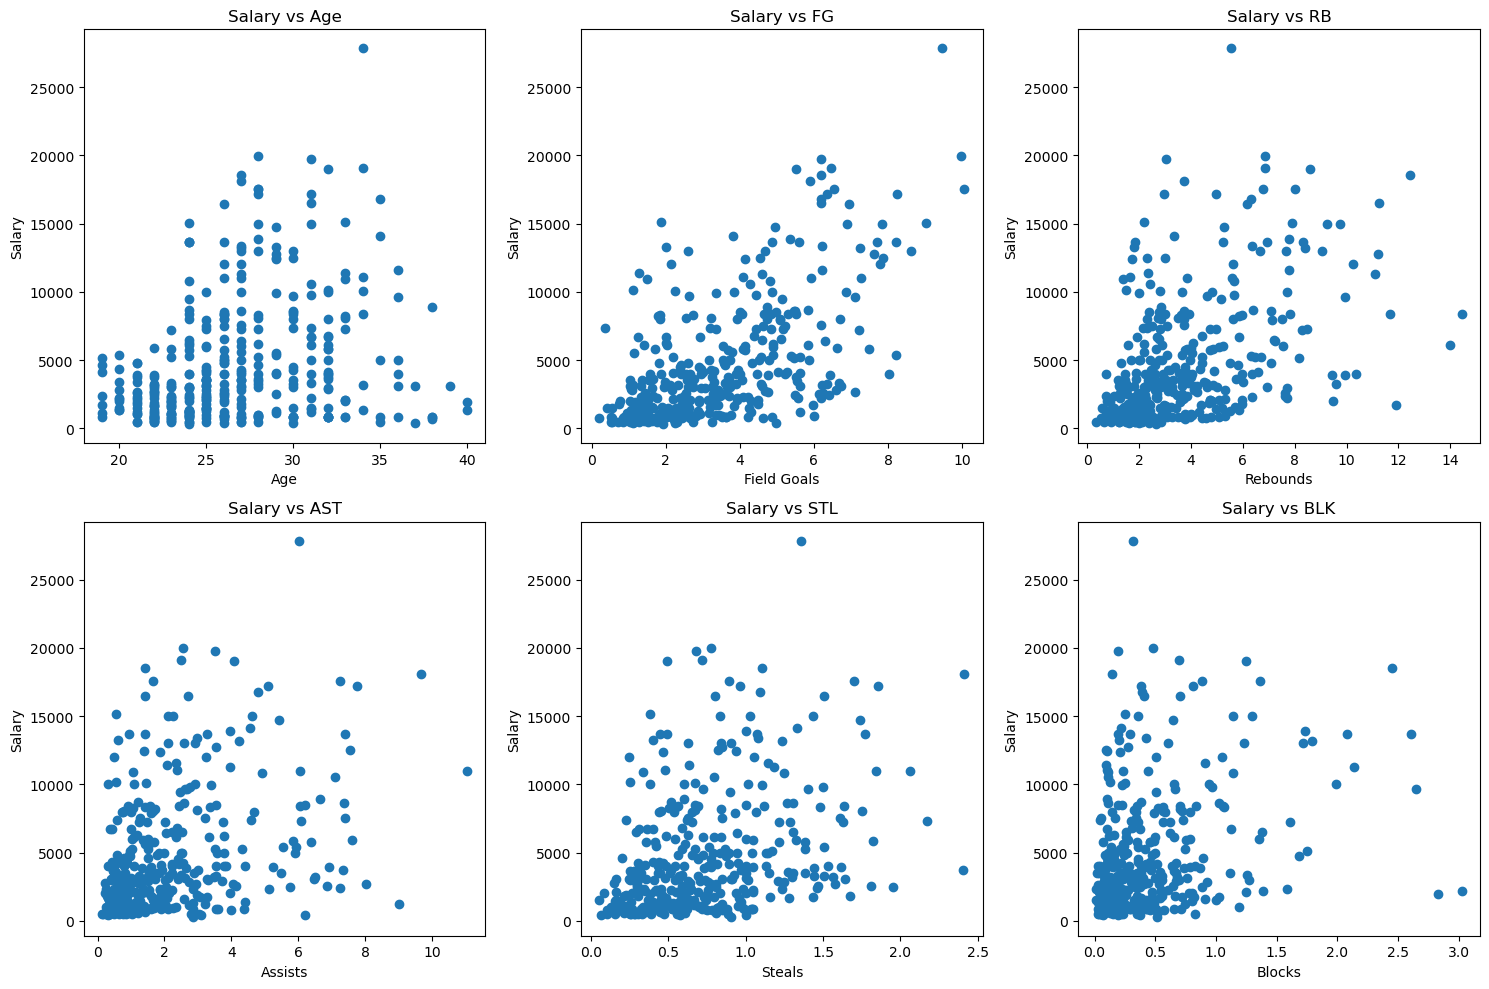

In [5]:
def scatter_plot(x, y, dataframe, axis, title, xlabel, ylabel):
    axis.scatter(dataframe[x], dataframe[y])
    axis.set_title(title)
    axis.set_xlabel(xlabel)
    axis.set_ylabel(ylabel)

# Create a 2x3 grid of scatter plots
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
scatter_plot('Age', 'Salary', nba, ax[0, 0], 'Salary vs Age', 'Age', 'Salary')
scatter_plot('FG', 'Salary', nba, ax[0, 1], 'Salary vs FG', 'Field Goals', 'Salary')
scatter_plot('RB', 'Salary', nba, ax[0, 2], 'Salary vs RB', 'Rebounds', 'Salary')
scatter_plot('AST', 'Salary', nba, ax[1, 0], 'Salary vs AST', 'Assists', 'Salary')
scatter_plot('STL', 'Salary', nba, ax[1, 1], 'Salary vs STL', 'Steals', 'Salary')
scatter_plot('BLK', 'Salary', nba, ax[1, 2], 'Salary vs BLK', 'Blocks', 'Salary')

# Adjust layout
plt.tight_layout()
plt.show()

- There is not a clear linear relationship between age and salary. The data is scattered and there is no clear pattern. The data is not linearly separable. This makes sense as a player's age does not necessarily determine their salary as their skillset and experience are more important factors.

- There are moderately strong linear relationship between salary and field goals made and rebounds. This makes sense as these are important statistics in determining a player's skillset and therefore their salary.

- The linear relationship between salary and assists, steals and blocks are less strong than the relationship between salary and field goals made and rebounds. This makes sense as these statistics are less important in determining a player's skillset. 

Regression A

In [6]:
import pyrsm as rsm
reg = rsm.regress({"nba": nba}, rvar="Salary", evar=['Age', 'FG', 'RB', 'AST', 'STL', 'BLK'])
reg.summary()

Linear regression (OLS)
Data                 : nba
Response variable    : Salary
Explanatory variables: Age, FG, RB, AST, STL, BLK
Null hyp.: the effect of x on Salary is zero
Alt. hyp.: the effect of x on Salary is not zero

           coefficient  std.error  t.value p.value     
Intercept     -8724.67   1131.833   -7.708  < .001  ***
Age             312.09     39.520    7.897  < .001  ***
FG             1156.98    153.881    7.519  < .001  ***
RB              223.31    117.004    1.909   0.057    .
AST             280.50    146.504    1.915   0.056    .
STL           -1064.07    613.248   -1.735   0.084    .
BLK            1071.10    517.030    2.072   0.039    *

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.492, Adjusted R-squared: 0.484
F-statistic: 58.632 df(6, 363), p.value < 0.001
Nr obs: 370


- The predictors age, field goal made and blocks per game are all significant as they have a very small p-value that are less than the significance level. Hence, we can reject the null hypothesis and conclude that there is indeed some sort of relationship between these predictors and salary. It makes sense that field goal made and blocks per game are significant as they are important statistics in determining a player's skillset. It is also not surprising that age is significant as a player's age is a good indicator of their experience and skillset.

- The predictors assists, steals and rebounds are not significant as they have a p-value that is greater than the significance level. Hence, we fail to reject the null hypothesis and conclude that there is no relationship between these predictors and salary. It does not really make sense because they are important aspects in the game of basketball and should be important in determining a player's skillset and therefore their salary.

- To interpret the coefficients, we will only be looking at those that are statistically significant. For every 1 unit increase in age, there is a 312.09 unit increase in salary. For every 1 unit increase in field goals made, there is a 1156.98 unit increase in salary. For every 1 unit increase in blocks per game, there is a 1071.10 unit increase in salary.

- It seems like field goal made per game is the most impactful predictor of salary as it has the highest coefficient.

- The R-squared value of 0.492 suggests that the model has moderate explanatory power, there is still significant room for improvement, perhaps by including other relevant predictors, considering interaction effects, or using different types of models that can capture more complex relationships

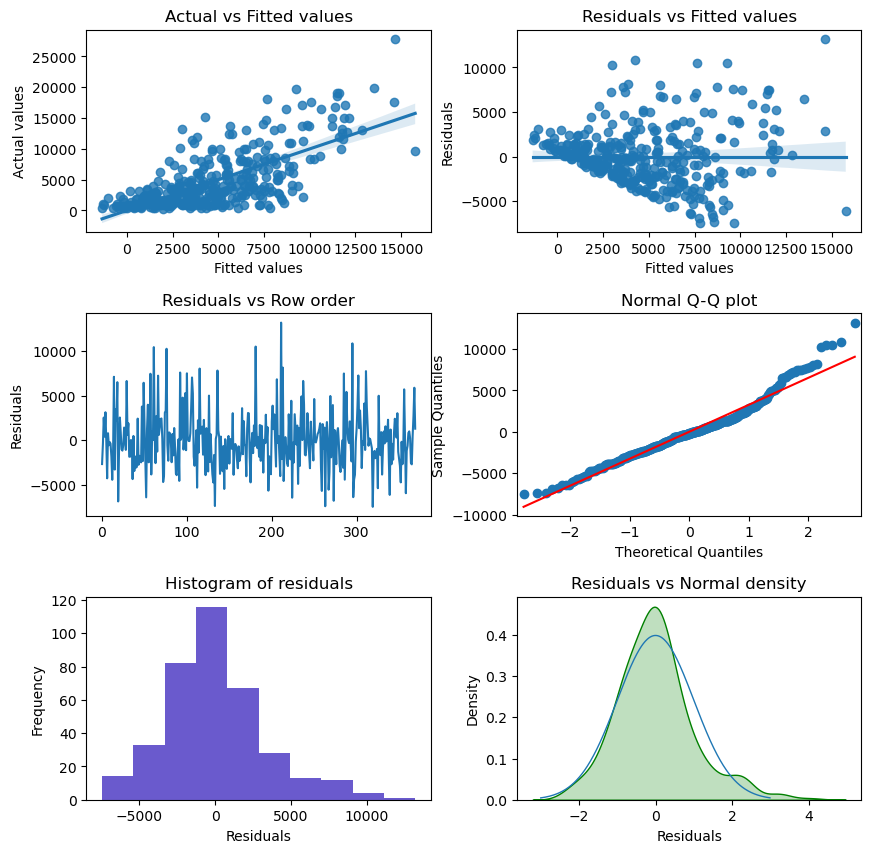

In [7]:
reg.plot("dashboard")

- Most of the plots looks good. One thing we want to point out is that in the Actual vs Fitted plot. It seems like the higher the salary is the less predictive power the model has.

- In the Residuals vs Fitted Values Plot, the residuals are not randomly distributed around the 0 line. In linear regression models, we would assume homoscedasticity indicating the variance are equal. Here, with the residuals spreading out for higher fitted values, which suggests potential heteroscedasticity.



Regression B

In [8]:
nba['log_Salary'] = np.log(nba['Salary'])

Text(0, 0.5, 'Frequency')

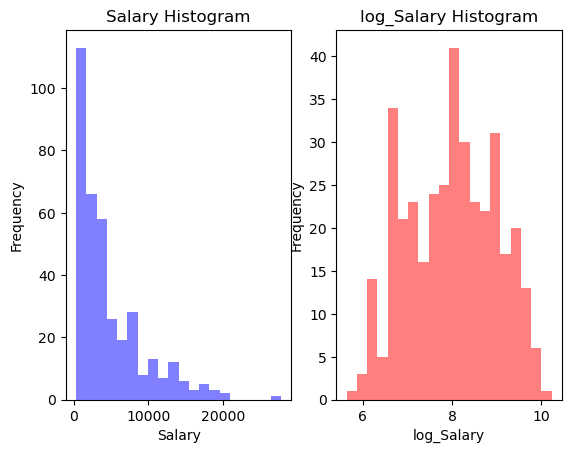

In [9]:
plt.subplot(1, 2, 1)
plt.hist(nba['Salary'], bins=20, color='blue', alpha=0.5)
plt.title('Salary Histogram')
plt.xlabel('Salary')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(nba['log_Salary'], bins=20, color='red', alpha=0.5)
plt.title('log_Salary Histogram')
plt.xlabel('log_Salary')
plt.ylabel('Frequency')

- Before the transformation, the histogram is extremely rightly skewed. After the logarithmic transformation, the distribution of log_Salary appears to be more symmetric and less skewed. The log transformation makes the distribution more bell-shaped, which can improve the performance and interpretation of the linear regression model. It normalizes the distribution and reduces the impact of outliers, which in the original scale could disproportionately affect the regression results.

In [10]:
reg1 = rsm.regress({"nba": nba}, rvar="log_Salary", evar=['Age', 'FG', 'RB', 'AST', 'STL', 'BLK'])
reg1.summary()

Linear regression (OLS)
Data                 : nba
Response variable    : log_Salary
Explanatory variables: Age, FG, RB, AST, STL, BLK
Null hyp.: the effect of x on log_Salary is zero
Alt. hyp.: the effect of x on log_Salary is not zero

           coefficient  std.error  t.value p.value     
Intercept         5.30      0.255   20.803  < .001  ***
Age               0.06      0.009    6.487  < .001  ***
FG                0.21      0.035    5.994  < .001  ***
RB                0.07      0.026    2.533   0.012    *
AST               0.05      0.033    1.403   0.162     
STL               0.00      0.138    0.013    0.99     
BLK               0.21      0.116    1.807   0.072    .

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.455, Adjusted R-squared: 0.446
F-statistic: 50.599 df(6, 363), p.value < 0.001
Nr obs: 370


- Age (p < .001) and FG (p < .001) are statistically significant at the 1% level, indicating a very strong association with log_Salary. Rebound per game (p = 0.012) is significant at the 5% level, showing a notable but less strong association. Block (p = 0.072) is marginally significant, close to the 10% level, indicating a weaker association that may or may not be practically significant.

- Age is still a strong factor that affects the salary which does not really make sense. The rest make sense in some way.

- The R-squared value of 0.455 suggests that the model has moderate explanatory power, there is still significant room for improvement, perhaps by including other relevant predictors, considering interaction effects, or using different types of models that can capture more complex relationships. However, the value decreases comparing to the previous model which may suggest that this transformation is not ideal.

- For every additional year of age, there is an expected 0.06 unit of increase in log salary. For every additional field goal made, there is an expected 0.21 unit of increase in log salary. For every additional rebound, there is an expected 0.07 unit of increase in log salary.

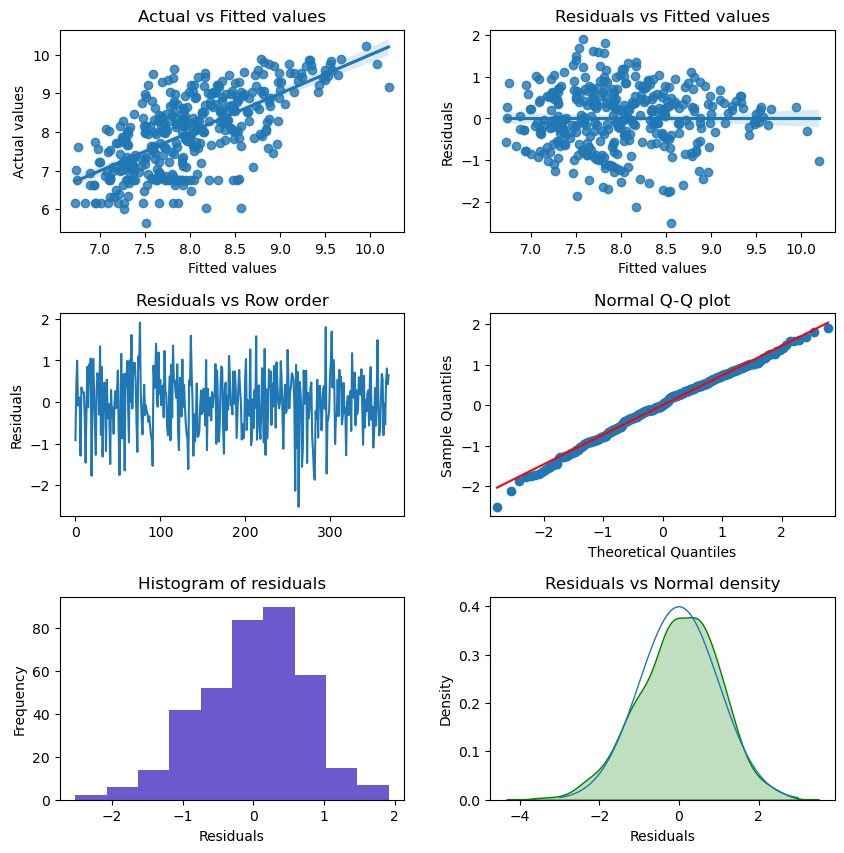

In [11]:
reg1.plot("dashboard")

- All of the plots look good in the dashboard except for the Residuals vs Fitted Values Plot. The problem of heterocadasdicity is still present in this model.

Regression C

In [12]:
reg2 = rsm.regress({"nba": nba}, rvar="log_Salary", evar=['Age', 'FG', 'RB', 'AST', 'STL', 'BLK','PTS'])
reg2.summary()

Linear regression (OLS)
Data                 : nba
Response variable    : log_Salary
Explanatory variables: Age, FG, RB, AST, STL, BLK, PTS
Null hyp.: the effect of x on log_Salary is zero
Alt. hyp.: the effect of x on log_Salary is not zero

           coefficient  std.error  t.value p.value     
Intercept         5.30      0.253   20.944  < .001  ***
Age               0.06      0.009    6.524  < .001  ***
FG               -0.12      0.130   -0.901   0.368     
RB                0.08      0.027    3.081   0.002   **
AST               0.04      0.033    1.347   0.179     
STL              -0.05      0.139   -0.378   0.706     
BLK               0.25      0.117    2.153   0.032    *
PTS               0.12      0.046    2.592    0.01   **

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.465, Adjusted R-squared: 0.455
F-statistic: 45.013 df(7, 362), p.value < 0.001
Nr obs: 370


- In the new model, the R-squared value increased by 0.01. This suggests that the new model is slightly better than the previous model after adding the new predictor points. This makes sense as the number of points a player scores is a good indicator of their skillset and therefore their salary.

Regression D

In [13]:
from sklearn.preprocessing import StandardScaler
df = nba.copy()

df[['log_Salary', 'Age', 'RB', 'AST', 'STL', 'BLK', 'PTS']] = StandardScaler().fit_transform(df[['log_Salary', 'Age', 'RB', 'AST', 'STL', 'BLK', 'PTS']])

reg3 = rsm.regress({"nba": df}, rvar="log_Salary", evar=['Age', 'RB', 'AST', 'STL', 'BLK','PTS'])
reg3.summary()

Linear regression (OLS)
Data                 : nba
Response variable    : log_Salary
Explanatory variables: Age, RB, AST, STL, BLK, PTS
Null hyp.: the effect of x on log_Salary is zero
Alt. hyp.: the effect of x on log_Salary is not zero

           coefficient  std.error  t.value p.value     
Intercept        -0.00      0.038   -0.000     1.0     
Age               0.25      0.039    6.544  < .001  ***
RB                0.18      0.063    2.953   0.003   **
AST               0.08      0.062    1.266   0.206     
STL              -0.02      0.060   -0.301   0.763     
BLK               0.11      0.054    2.045   0.042    *
PTS               0.43      0.066    6.513  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.464, Adjusted R-squared: 0.455
F-statistic: 52.407 df(6, 363), p.value < 0.001
Nr obs: 370


## Hot Hand Hypothesis Testing

#### Conditional Probability Approach

From a bird’s eye point of view:

– What is your impression on what the data is saying?

The data is saying that almost all the players have a higher probability of hitting a shot after a miss than after a hit. Also the probabilities of just a hit are quite good for most of the players.


– Just from examination, which players seem to exhibit the hot hand and which
ones do not?

Player B whose P{hit |1 hit} is 0.53 > P{hit} = 0.52 > P{hit |1 miss} = 0.51 seems to exhibit the hot hand. All though the probabilities are very close to each other, it is the only player whose P{hit |1 hit} is greater than P{hit |1 miss} and P{hit}. Rest all the players have P{hit |1 hit} < P{hit |1 miss} and P{hit}. In the case of equal probabilities, it is tough to say if the player has a hot hand or not.


– What is your logical reasoning?

The logical reasoning is that if a player has a hot hand, then the probability of hitting a shot after a hit should be greater than the probability of hitting a shot after a miss. This is because the player is in a good form and is more likely to hit a shot after a hit. This is what we see in the case of Player B. For the rest of the players, the probability of hitting a shot after a miss is greater than the probability of hitting a shot after a hit. This is because the player is not in a good form and is more likely to hit a shot after a miss.

In [39]:
data = {
    'Player': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'],
    'P(hit | 1 miss)': [0.56, 0.51, 0.46, 0.60, 0.47, 0.51, 0.58, 0.52, 0.71],
    'P(hit)': [0.50, 0.52, 0.46, 0.56, 0.47, 0.46, 0.54, 0.52, 0.62],
    'P(hit | 1 hit)': [0.49, 0.53, 0.46, 0.55, 0.45, 0.43, 0.53, 0.51, 0.57]
}

df = pd.DataFrame(data)

#For each player, calculate the difference:P(hit∣1 hit)−P(hit∣1 miss)
#test on this difference is a good way to test whether the player has a hot hand or not.
df['difference'] = df['P(hit | 1 hit)'] - df['P(hit | 1 miss)']

# Null Hypothesis H0: <= 0
# Alternative Hypothesis H1: > 0

#We have a small sample size (n=9), so we can use the t-test

sm = rsm.basics.single_mean({"df": df}, "difference", "greater", 0.95, 0)
sm.summary()

df

Single mean test
Data      : df
Variables : difference
Confidence: 0.95
Comparison: 0

Null hyp. : the mean of difference is equal to 0
Alt. hyp. : the mean of difference is greater than 0

  mean  n  n_missing    sd    se    me
-0.044  9          0 0.049 0.016 0.037
  diff    se  t.value  p.value  df   5.0%  100%  
-0.044 0.016   -2.734    0.987   8 -0.075   inf  

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


,Player,P(hit | 1 miss),P(hit),P(hit | 1 hit),difference
0,A,0.56,0.50,0.49,-0.07
1,B,0.51,0.52,0.53,0.02
2,C,0.46,0.46,0.46,0.00
3,D,0.60,0.56,0.55,-0.05
4,E,0.47,0.47,0.45,-0.02
5,F,0.51,0.46,0.43,-0.08
6,G,0.58,0.54,0.53,-0.05
7,H,0.52,0.52,0.51,-0.01
8,I,0.71,0.62,0.57,-0.14


p-value = 0.987

Since the p-value is significantly greater than the significance level of 0.05, we fail to reject the null hypothesis. Hence, we conclude that there is no evidence to suggest that the players have a hot hand.

#### Streaks Approach

In [40]:
import pandas as pd
import numpy as np
from collections import defaultdict
import pyrsm as rsm

p_h = df['P(hit)'].tolist()

N = 1000000

shots = [248, 884, 419, 339, 272, 451, 433, 351, 403]
actual_runs = [128, 431, 203, 172, 134, 245, 227, 176, 220]
players = ['Player_A', 'Player_B', 'Player_C', 'Player_D', 'Player_E', 'Player_F', 'Player_G', 'Player_H', 'Player_I']

result_shots = defaultdict(list)

for i in range(len(shots)):
    result_shots[players[i]] = np.random.binomial(shots[i], p_h[i], N)

expected_runs = [result_shots[i].mean() for i in result_shots]
expected_runs

expected_sd = [result_shots[i].std() for i in result_shots]
expected_sd

df_results = pd.DataFrame({'Player': players, 'Number of shots': shots,'Actual Runs': actual_runs, 'Expected Runs': expected_runs, 'Expected SD': expected_sd})
df_results

,Player,Number of shots,Actual Runs,Expected Runs,Expected SD
0,Player_A,248,128,124.001801,7.863783
1,Player_B,884,431,459.681643,14.873298
2,Player_C,419,203,192.753890,10.219902
3,Player_D,339,172,189.851428,9.136763
4,Player_E,272,134,127.860481,8.231164
5,Player_F,451,245,207.464161,10.587779
6,Player_G,433,227,233.815475,10.377800
7,Player_H,351,176,182.514139,9.343068
8,Player_I,403,220,249.875511,9.742314


In [41]:
# H0: The number of runs is the same
# H1: The number of runs is different

rt = rsm.basics.compare_means({"df": df_results}, var1="Actual Runs", var2="Expected Runs", alt_hyp='two-sided')
rt.summary(extra=True)

Pairwise mean comparisons (t-test)
Data      : df
Variables : variable, value
Samples   : independent
Confidence: 0.95
Adjustment: None
     variable    mean  n  n_missing     sd     se     me
  Actual Runs 215.111  9          0 90.394 30.131 69.483
Expected Runs 218.647  9          0 99.645 33.215 76.594
                  Null hyp.                              Alt. hyp.   diff p.value     se  t.value    df    2.5%  97.5%  
Actual Runs = Expected Runs Actual Runs not equal to Expected Runs -3.535   0.938 44.846   -0.079 15.85 -98.677 91.606  

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


- There is no statistically significant evidence to suggest that the players exhibit a "hot hand" in their shooting performance.
- The high p-value and the confidence interval that includes zero support the null hypothesis that there is no significant difference between the actual and expected shooting performance.

- We don't have enough evidence because with a sample size of 9 might not be sufficient to capture the variability in player performance. A larger sample could provide a more accurate picture.

### Critical Thinking

In [44]:
import pandas as pd

df_basketball = pd.read_parquet('BasketballRelationships.parquet')
df_baseball = pd.read_parquet('BaseballRelationships.parquet')

df_basketball.head()
df_baseball.head()

,atbats,hits,avg
0,384,97,0.252604
1,296,84,0.283784
2,334,94,0.281437
3,626,176,0.281150
4,558,130,0.232975


#### Basketball

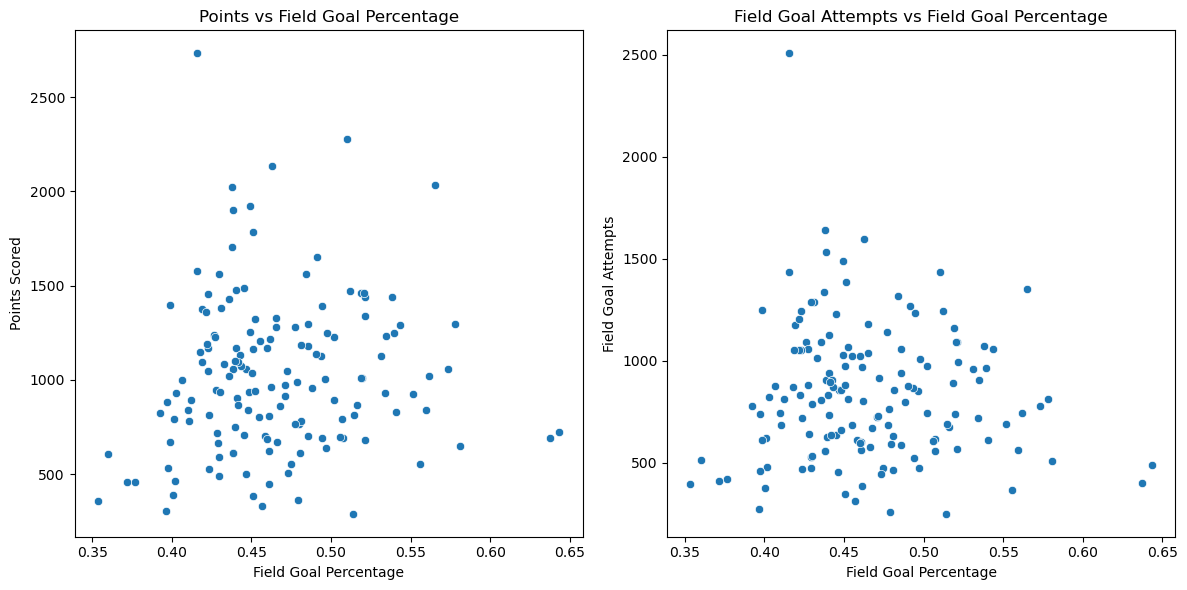

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the basketball data
basketball_data = pd.read_parquet('BasketballRelationships.parquet')

# Visualization for basketball data
plt.figure(figsize=(12, 6))

# Points vs Percentage
plt.subplot(1, 2, 1)
sns.scatterplot(data=basketball_data, x='percentage', y='points')
plt.title('Points vs Field Goal Percentage')
plt.xlabel('Field Goal Percentage')
plt.ylabel('Points Scored')

# Attempts vs Percentage
plt.subplot(1, 2, 2)
sns.scatterplot(data=basketball_data, x='percentage', y='attempts')
plt.title('Field Goal Attempts vs Field Goal Percentage')
plt.xlabel('Field Goal Percentage')
plt.ylabel('Field Goal Attempts')

plt.tight_layout()
plt.show()

#### Baseball

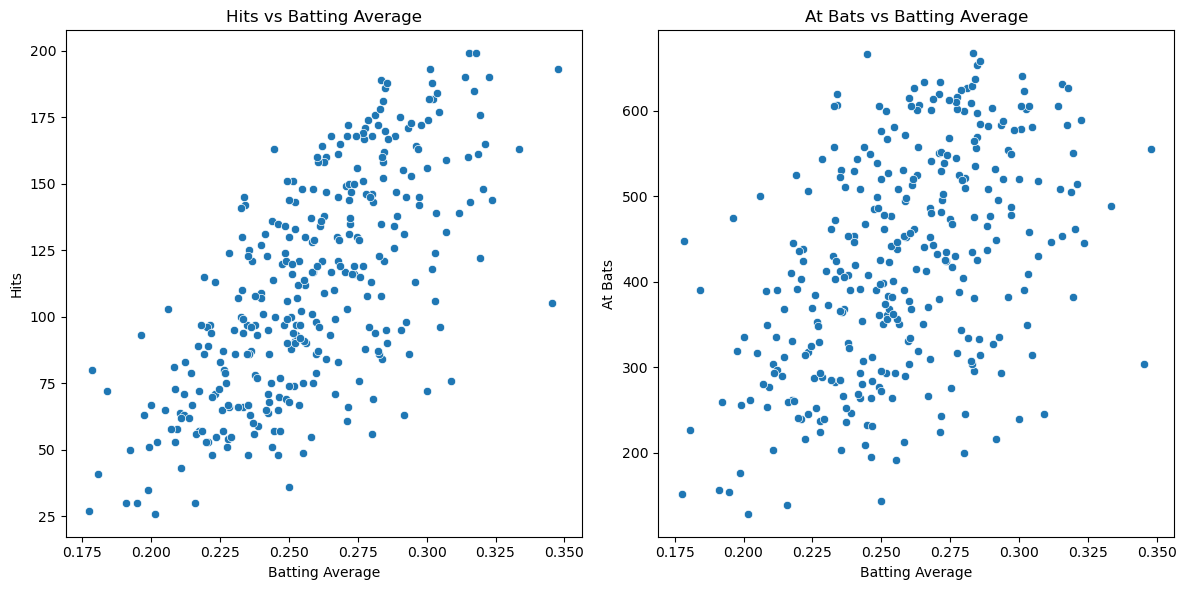

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the baseball data
baseball_data = pd.read_parquet('BaseballRelationships.parquet')

# Visualization for baseball data
plt.figure(figsize=(12, 6))

# Hits vs Batting Average
plt.subplot(1, 2, 1)
sns.scatterplot(data=baseball_data, x='avg', y='hits')
plt.title('Hits vs Batting Average')
plt.xlabel('Batting Average')
plt.ylabel('Hits')

# Atbats vs Batting Average
plt.subplot(1, 2, 2)
sns.scatterplot(data=baseball_data, x='avg', y='atbats')
plt.title('At Bats vs Batting Average')
plt.xlabel('Batting Average')
plt.ylabel('At Bats')

plt.tight_layout()
plt.show()


What might make the hot hand easier or more difficult to observe in either sport?

- In basketball, the frequent and rapid shooting opportunities make it easier to notice patterns such as streaks in a player's performance, which can be analyzed in isolation. However, this can be complicated by factors like varying defensive pressure, the context of the game (like a close match vs. a one-sided game), and the different roles of players (starters vs. bench players).

- In contrast, in baseball, it's more challenging to observe such patterns due to the less frequent batting opportunities and the dynamic of the pitcher trying to prevent hits. Additionally, the binary nature of batting outcomes (hit or no hit) makes it harder to identify patterns, unlike the varied scoring methods in basketball.

What would you need to do in order to establish that the hot hand exists in basketball?

- To establish the existence of the "hot hand" phenomenon in basketball, a thorough statistical analysis of shooting data across numerous games is necessary to determine if players show significant success streaks beyond random chance. This analysis should incorporate contextual factors such as the game's situation, defensive pressure, player fatigue, and psychological elements. Additionally, using longitudinal data spanning multiple seasons is crucial to avoid biases from the peculiarities of a single season.

How you would build a regression model to try to establish that a hot hand exists?

- For investigating the "hot hand" phenomenon, a logistic regression model can be used to predict whether each basketball shot is made or missed. Key variables in this model would include the sequence of successful shots, the player's average shooting percentage, the time elapsed since the last shot, the player's fatigue level (measured in minutes played), the game's context (such as score difference and quarter), and potentially measurable psychological factors like the player's confidence level.

What would be critical predictor variables?

- In the model to analyze the "hot hand" phenomenon, critical predictors include the count of successful shots made before the current attempt, the player's average shooting accuracy across the season or career, various game context factors like the score difference, remaining time, and home or away status, as well as indicators of the player's physical and mental condition, including fatigue, recent performance trends, and measurable psychological states.

How much data would you need?

- To effectively model the "hot hand" phenomenon, a substantial and diverse dataset is needed, encompassing multiple seasons and a broad spectrum of players to reflect performance variability. This dataset should also provide in-depth, shot-by-shot details, capturing the context of each shot for a more accurate analysis.